In [1]:
import pandas as pd

df_yoga = pd.read_csv("naver_terms_yoga.csv")
df_stretching = pd.read_csv("naver_terms_stretching.csv")
df_workout = pd.read_csv("naver_terms_workout.csv")

In [2]:
df_yoga["종류"] = "요가"
df_stretching["종류"] = "스트레칭"
df_workout["종류"] = "근력 운동"

In [3]:
df_stretching.head()

,제목,개요,효과,썸네일,난이도,자세분류,부위,종류
0,운동 전후 스트레칭,NaN,NaN,https://dbscthumb-phinf.pstatic.net/0955_000_1...,NaN,NaN,NaN,스트레칭
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,스트레칭
2,아침 스트레칭,NaN,NaN,https://dbscthumb-phinf.pstatic.net/0955_000_1...,NaN,NaN,NaN,스트레칭
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,스트레칭
4,잠자기 전 스트레칭,NaN,NaN,https://dbscthumb-phinf.pstatic.net/0955_000_1...,NaN,NaN,NaN,스트레칭


In [4]:
df_all = pd.concat([df_yoga, df_stretching, df_workout], ignore_index=True)
df_all.tail()

,제목,개요,효과,썸네일,난이도,자세분류,부위,종류
979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,근력 운동
980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,근력 운동
981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,근력 운동
982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,근력 운동
983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,근력 운동


In [5]:
df_all.describe()

,제목,개요,효과,썸네일,난이도,자세분류,부위,종류
count,273,269,136,259,220,101,230,984
unique,253,249,125,238,3,4,32,3
top,한쪽 다리 틀어 비틀기,"앉은 산 자세는 어깨와 팔, 척추를 스트레칭 해주고 깊은 호흡을 유도해주는 동작이다...",- 편안한 호흡을 돕는다. \r\n\t - 요통과 어깨 결림에 도움이 된다.\r\n...,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,누운 자세,복부,근력 운동
freq,2,2,2,2,137,39,31,506


In [6]:
# "종류" 컬럼을 제외한 나머지 컬럼 목록 추출
cols_except_kind = df_all.columns.difference(["종류"])

# 그 컬럼들 전부가 NaN인 행을 제거
before = len(df_all)
df_all = df_all[~df_all[cols_except_kind].isna().all(axis=1)]
after = len(df_all)

print(f"드랍 행 수: {before - after}")
print(f"남은 행 수: {after}")

드랍 행 수: 711
남은 행 수: 273


In [7]:
print(df_all.isna().sum())

제목        0
개요        4
효과      137
썸네일      14
난이도      53
자세분류    172
부위       43
종류        0
dtype: int64


In [8]:
before = len(df_all)
df_all = df_all.dropna(subset=["개요", "효과"], how="all")
after = len(df_all)

print(f"제거된 행 수: {before - after}")
print(f"남은 전체 행 수: {after}")


제거된 행 수: 4
남은 전체 행 수: 269


In [9]:
print(df_all.isna().sum())

제목        0
개요        0
효과      133
썸네일      14
난이도      49
자세분류    168
부위       39
종류        0
dtype: int64


In [10]:
df_all.loc[df_all["종류"] == "스트레칭", "난이도"] = "초급"

In [11]:
print(df_all.isna().sum())

제목        0
개요        0
효과      133
썸네일      14
난이도      14
자세분류    168
부위       39
종류        0
dtype: int64


In [12]:
print(f"전체 행 수: {len(df_all)}")

전체 행 수: 269


In [13]:
duplicates_count = df_all.duplicated().sum()
print(f"중복된 행 수 (첫 번째 제외): {duplicates_count}")


중복된 행 수 (첫 번째 제외): 19


In [14]:
df_all = df_all.drop_duplicates(keep='first')


In [15]:
print(f"중복 제거 후 전체 행 수: {len(df_all)}")

중복 제거 후 전체 행 수: 250


In [16]:
print(df_all.isna().sum())

제목        0
개요        0
효과      124
썸네일      12
난이도      12
자세분류    159
부위       36
종류        0
dtype: int64


In [17]:
df_all.describe()

,제목,개요,효과,썸네일,난이도,자세분류,부위,종류
count,250,250,126,238,238,91,214,250
unique,249,249,125,238,3,4,32,3
top,사이드 런지,전완의 바깥쪽 근육을 발달시키는 운동이다. 벤치 가장자리나 무릎 위에 전완부를 고정...,- 옆구리 경락을 자극한다. \r\n\t - 척추의 좌우 균형을 맞춘다.,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,누운 자세,복부,근력 운동
freq,2,2,2,1,159,36,28,124


In [18]:
df_all.to_csv("df_all_cleaned.csv", index=False, encoding='utf-8-sig')

In [19]:
df_all.describe(include='all').transpose().to_csv("df_all_summary.csv", encoding='utf-8-sig')


In [20]:
no_thumbnail_df = df_all[df_all['썸네일'].isna()]
print(no_thumbnail_df)

           제목                                                 개요   효과  썸네일  \
534     어깨 운동  어깨 운동은 일반적으로 삼각근 운동을 뜻한다. 삼각근은 전면, 측면, 후면으로 나뉘...  NaN  NaN   
540     허리 운동  허리 운동, 즉 척추기립근 운동은 넓게는 등 운동에 속한다. 척추기립근은 척추뼈를 ...  NaN  NaN   
548    종아리 운동  발을 지탱할 뿐만 아니라 걷거나 뛰는 데 중요한 역할을 하는 근육이 바로 종아리 근...  NaN  NaN   
614    아래팔 운동  전완은 아래팔을 뜻한다. 일반적으로 단련하는 운동 부위가 아니라 다소 생소하게 느낄...  NaN  NaN   
616   위팔 뒤 운동  팔 윗부분 뒤쪽에 있는 삼두근은 근육의 머릿 부분이 세 갈래로 나뉘어져 있어 이렇게...  NaN  NaN   
626     가슴 운동  우리가 쉽게 가슴근육이라고 하는 대흉근은 상부, 중앙, 하부 총 3가지 부위로 나뉘...  NaN  NaN   
640     복부 운동  복근은 내장을 보호하고 허리를 강화시키는 근육으로 크게 복직근, 내복사근, 외복사근...  NaN  NaN   
716     전신 운동  전신 운동은 시간이 없는 바쁜 사람들에게 빠르고 아주 효과적인 체력 강화 및 다이어...  NaN  NaN   
730  허벅지 앞 운동  허벅지, 곧 대퇴부는 전면에 네 가지 근육, 곧 대퇴직근, 내측광근, 외측광근 ,중...  NaN  NaN   
738      등 운동  등은 크게 네 가지 근육으로 구성되어 있다. 등에서 가장 넓은 면적을 차지하고 있는...  NaN  NaN   
752   위팔 앞 운동  팔 윗부분 앞쪽에 있는 이두근은 근육의 머릿 부분이 두 갈래로 나뉘어져 있어 이렇게...  NaN  NaN   
774    엉덩이 운동  엉덩이는 엉덩이 가운데에 위치하며 가장 큰 근육인 대둔근과 위쪽의 중둔근, 소둔근으...

In [21]:
print(f"삭제 전 행 개수: {len(df_all)}")

df_all = df_all[df_all['썸네일'].notna()]

print(f"삭제 후 행 개수: {len(df_all)}")

삭제 전 행 개수: 250
삭제 후 행 개수: 238


In [22]:
duplicate_mask = df_all.duplicated(keep=False)
duplicates = df_all[duplicate_mask]

In [23]:
unique_count = len(df_all.drop_duplicates())
print(f"유니크한 행 개수: {unique_count}")

유니크한 행 개수: 238


In [24]:
df_all.to_csv("cleaned_naver_terms.csv", index=False, encoding="utf-8-sig")

In [25]:
df_all['효과'] = df_all['효과'].str.replace('"', '', regex=False)
df_all.head()

,제목,개요,효과,썸네일,난이도,자세분류,부위,종류
0,고양이 자세,고양이 자세는 고양이의 다양한 자세를 본떠 만든 동작으로 척추의 S자 굴곡 유지에 ...,- 척추에 탄력과 유연성을 길러준다. \r\n\t - 소화를 돕는다. ...,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,앉은 자세,복부,요가
2,발끝 치기,"발끝 치기는 발끝의 혈액순환을 도와주는 자세로, 발을 비롯한 하체의 혈액순환을 원활...",- 발과 다리의 부종을 완화하는 효과가 있다. \r\n\t - 혈액순환을 촉진시킨다...,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,앉은 자세,발,요가
4,케겔 운동,"케겔 운동은 질 주위 근육을 조였다 펴기를 반복하는 골반근육 강화 운동으로, 순산에...",- 자연 분만이 쉽도록 해준다. \r\n\t - 요실금에 도움이 된다.,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,선 자세,NaN,요가
6,바람 빼기 자세,"바람 빼기 자세는 일명 방귀 자세라고도 한다. 허리 통증을 완화시키고, 체내 가스를...",- 숙변을 제거한다. \r\n\t - 요통을 완화시켜주는 효과가 있다. \r\n\t...,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,누운 자세,NaN,요가
8,코브라 자세,"코브라 자세는 척추를 교정하며 혈액순환을 원활히 해주는 효과가 있다. 전신의 군살,...","- 혈액순환을 돕는다.\r\n\t - 전신의 군살, 특히 등과 배, 허리를 날씬하게...",https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,누운 자세,허리,요가


In [27]:
df_all['효과'] = df_all['효과'].str.replace('\r\n\t', ' ', regex=False)
df_all.head()

,제목,개요,효과,썸네일,난이도,자세분류,부위,종류
0,고양이 자세,고양이 자세는 고양이의 다양한 자세를 본떠 만든 동작으로 척추의 S자 굴곡 유지에 ...,- 척추에 탄력과 유연성을 길러준다. - 소화를 돕는다. ...,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,앉은 자세,복부,요가
2,발끝 치기,"발끝 치기는 발끝의 혈액순환을 도와주는 자세로, 발을 비롯한 하체의 혈액순환을 원활...",- 발과 다리의 부종을 완화하는 효과가 있다. - 혈액순환을 촉진시킨다. -...,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,앉은 자세,발,요가
4,케겔 운동,"케겔 운동은 질 주위 근육을 조였다 펴기를 반복하는 골반근육 강화 운동으로, 순산에...",- 자연 분만이 쉽도록 해준다. - 요실금에 도움이 된다.,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,선 자세,NaN,요가
6,바람 빼기 자세,"바람 빼기 자세는 일명 방귀 자세라고도 한다. 허리 통증을 완화시키고, 체내 가스를...",- 숙변을 제거한다. - 요통을 완화시켜주는 효과가 있다. - 가스를 방출한다.,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,누운 자세,NaN,요가
8,코브라 자세,"코브라 자세는 척추를 교정하며 혈액순환을 원활히 해주는 효과가 있다. 전신의 군살,...","- 혈액순환을 돕는다. - 전신의 군살, 특히 등과 배, 허리를 날씬하게 만든다....",https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,누운 자세,허리,요가


In [28]:
df_all['효과'] = df_all['효과'].str.replace(r'\s*-\s*', ' ', regex=True).str.strip()
df_all.head()

,제목,개요,효과,썸네일,난이도,자세분류,부위,종류
0,고양이 자세,고양이 자세는 고양이의 다양한 자세를 본떠 만든 동작으로 척추의 S자 굴곡 유지에 ...,척추에 탄력과 유연성을 길러준다. 소화를 돕는다. 어깨가 유연해진다.,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,앉은 자세,복부,요가
2,발끝 치기,"발끝 치기는 발끝의 혈액순환을 도와주는 자세로, 발을 비롯한 하체의 혈액순환을 원활...",발과 다리의 부종을 완화하는 효과가 있다. 혈액순환을 촉진시킨다. 허벅지를 날씬하게...,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,앉은 자세,발,요가
4,케겔 운동,"케겔 운동은 질 주위 근육을 조였다 펴기를 반복하는 골반근육 강화 운동으로, 순산에...",자연 분만이 쉽도록 해준다. 요실금에 도움이 된다.,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,선 자세,NaN,요가
6,바람 빼기 자세,"바람 빼기 자세는 일명 방귀 자세라고도 한다. 허리 통증을 완화시키고, 체내 가스를...",숙변을 제거한다. 요통을 완화시켜주는 효과가 있다. 가스를 방출한다.,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,누운 자세,NaN,요가
8,코브라 자세,"코브라 자세는 척추를 교정하며 혈액순환을 원활히 해주는 효과가 있다. 전신의 군살,...","혈액순환을 돕는다. 전신의 군살, 특히 등과 배, 허리를 날씬하게 만든다. 어깨, ...",https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,누운 자세,허리,요가


In [29]:
df_all['개요_효과_합침'] = df_all['개요'].fillna('') + ' ' + df_all['효과'].fillna('')
df_all['개요_효과_합침'] = df_all['개요_효과_합침'].str.strip()  # 혹시 앞뒤 공백 제거

In [30]:
df_all.head()

,제목,개요,효과,썸네일,난이도,자세분류,부위,종류,개요_효과_합침
0,고양이 자세,고양이 자세는 고양이의 다양한 자세를 본떠 만든 동작으로 척추의 S자 굴곡 유지에 ...,척추에 탄력과 유연성을 길러준다. 소화를 돕는다. 어깨가 유연해진다.,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,앉은 자세,복부,요가,고양이 자세는 고양이의 다양한 자세를 본떠 만든 동작으로 척추의 S자 굴곡 유지에 ...
2,발끝 치기,"발끝 치기는 발끝의 혈액순환을 도와주는 자세로, 발을 비롯한 하체의 혈액순환을 원활...",발과 다리의 부종을 완화하는 효과가 있다. 혈액순환을 촉진시킨다. 허벅지를 날씬하게...,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,앉은 자세,발,요가,"발끝 치기는 발끝의 혈액순환을 도와주는 자세로, 발을 비롯한 하체의 혈액순환을 원활..."
4,케겔 운동,"케겔 운동은 질 주위 근육을 조였다 펴기를 반복하는 골반근육 강화 운동으로, 순산에...",자연 분만이 쉽도록 해준다. 요실금에 도움이 된다.,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,선 자세,NaN,요가,"케겔 운동은 질 주위 근육을 조였다 펴기를 반복하는 골반근육 강화 운동으로, 순산에..."
6,바람 빼기 자세,"바람 빼기 자세는 일명 방귀 자세라고도 한다. 허리 통증을 완화시키고, 체내 가스를...",숙변을 제거한다. 요통을 완화시켜주는 효과가 있다. 가스를 방출한다.,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,누운 자세,NaN,요가,"바람 빼기 자세는 일명 방귀 자세라고도 한다. 허리 통증을 완화시키고, 체내 가스를..."
8,코브라 자세,"코브라 자세는 척추를 교정하며 혈액순환을 원활히 해주는 효과가 있다. 전신의 군살,...","혈액순환을 돕는다. 전신의 군살, 특히 등과 배, 허리를 날씬하게 만든다. 어깨, ...",https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,누운 자세,허리,요가,"코브라 자세는 척추를 교정하며 혈액순환을 원활히 해주는 효과가 있다. 전신의 군살,..."


In [31]:
df_all.to_csv("df_all_with_summary.csv", index=False, encoding="utf-8-sig")


In [32]:
df_all = df_all.drop(columns=["개요", "효과"])
df_all.head()

,제목,썸네일,난이도,자세분류,부위,종류,개요_효과_합침
0,고양이 자세,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,앉은 자세,복부,요가,고양이 자세는 고양이의 다양한 자세를 본떠 만든 동작으로 척추의 S자 굴곡 유지에 ...
2,발끝 치기,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,앉은 자세,발,요가,"발끝 치기는 발끝의 혈액순환을 도와주는 자세로, 발을 비롯한 하체의 혈액순환을 원활..."
4,케겔 운동,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,선 자세,NaN,요가,"케겔 운동은 질 주위 근육을 조였다 펴기를 반복하는 골반근육 강화 운동으로, 순산에..."
6,바람 빼기 자세,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,누운 자세,NaN,요가,"바람 빼기 자세는 일명 방귀 자세라고도 한다. 허리 통증을 완화시키고, 체내 가스를..."
8,코브라 자세,https://dbscthumb-phinf.pstatic.net/0955_000_1...,초급,누운 자세,허리,요가,"코브라 자세는 척추를 교정하며 혈액순환을 원활히 해주는 효과가 있다. 전신의 군살,..."


In [33]:
df_all.to_csv("df_all_with_summary.csv", index=False, encoding="utf-8-sig")

In [38]:
df_all['부위'].value_counts()


부위
복부                                                                                                  27
가슴                                                                                                  14
허리                                                                                                  13
전신                                                                                                  12
어깨                                                                                                  12
등                                                                                                   12
위팔 앞                                                                                                11
허벅지 앞                                                                                               11
엉덩이                                                                                                 10
허벅지                                                                   

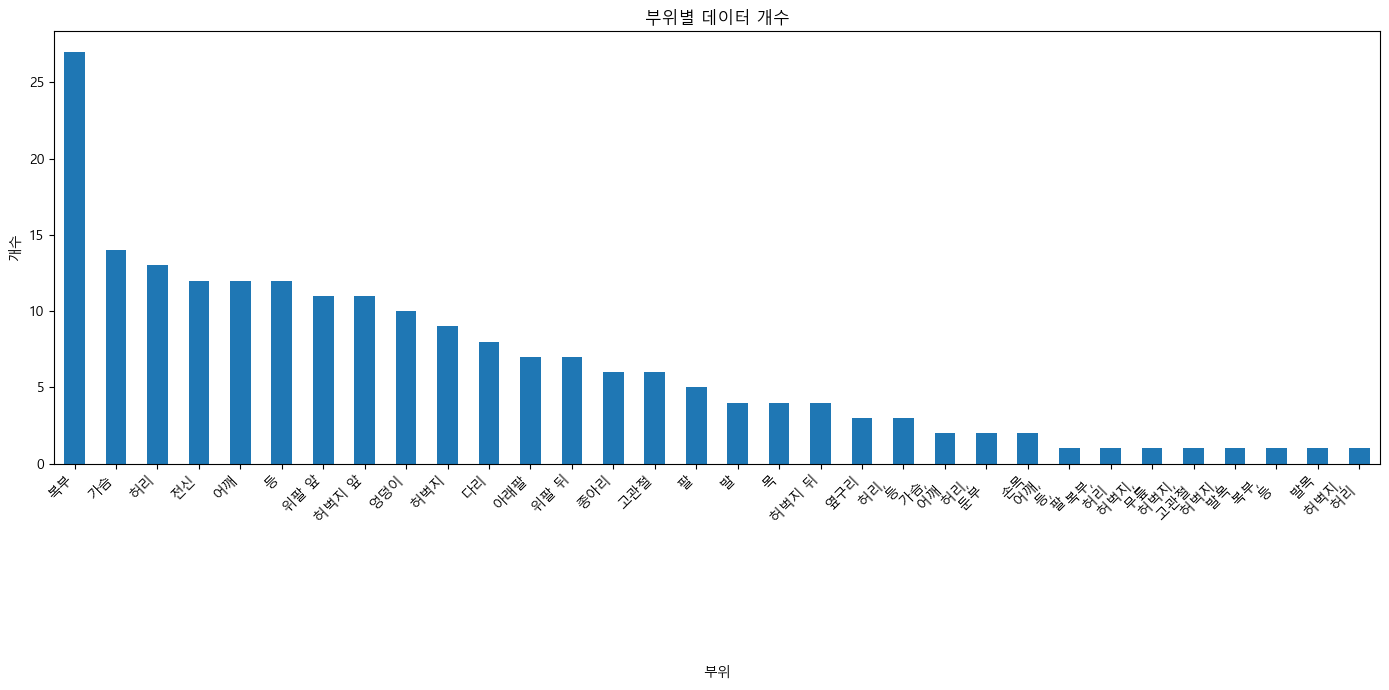

In [41]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

counts = df_all['부위'].value_counts()

plt.figure(figsize=(14,7))
counts.plot(kind='bar')
plt.title('부위별 데이터 개수')
plt.xlabel('부위')
plt.ylabel('개수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [42]:
df_all['부위'] = df_all['부위'].replace({
    '허벅지 앞': '허벅지',
    '허벅지 뒤': '허벅지'
})

In [43]:
print(df_all['부위'].value_counts())

부위
복부                                                                                                  27
허벅지                                                                                                 24
가슴                                                                                                  14
허리                                                                                                  13
등                                                                                                   12
전신                                                                                                  12
어깨                                                                                                  12
위팔 앞                                                                                                11
엉덩이                                                                                                 10
다리                                                                    

In [44]:
df_all['부위'] = df_all['부위'].replace({
    '위팔 앞': '팔',
    '위팔 뒤': '팔',
    '아래팔': '팔'
})

In [45]:
print(df_all['부위'].value_counts())

부위
팔                                                                                                   30
복부                                                                                                  27
허벅지                                                                                                 24
가슴                                                                                                  14
허리                                                                                                  13
등                                                                                                   12
전신                                                                                                  12
어깨                                                                                                  12
엉덩이                                                                                                 10
다리                                                                    

In [48]:
df_all['부위'] = df_all['부위'].str.replace('\s+', ' ', regex=True)  # 공백류 정리
df_all['부위'] = df_all['부위'].str.replace('\r', '', regex=False)
df_all['부위'] = df_all['부위'].str.replace('\n', '', regex=False)
df_all['부위'] = df_all['부위'].str.strip()  # 양 끝 공백 제거

In [49]:
print(df_all['부위'].value_counts())

부위
팔           30
복부          27
허벅지         24
가슴          14
허리          13
등           12
전신          12
어깨          12
엉덩이         10
다리           8
종아리          6
고관절          6
발            4
목            4
옆구리          3
허리, 등        3
손목           2
허리, 둔부       2
가슴, 어깨       2
복부, 등        1
허벅지, 발목      1
발목           1
허벅지, 고관절     1
복부, 허리       1
허벅지, 무릎      1
어깨, 등, 팔     1
허벅지, 허리      1
Name: count, dtype: int64


In [ ]:
df_all['부위'] = df_all['부위'].apply(lambda x: ', '.join([part.strip() for part in x.split(',')]))